For theoretical discussion please refer to theroretical discussion material on LMS. In this notebook we'll be implementing KNN and SVM to solve a simple problem [to make it possible to run in time], same procedure can very well scale to larger problems given enough time to run your codes.

Problem that we are discussing here pertains to predict which grade a student will belong to given their height and shoe size.

In [1]:
data_file='/media/dell/D_PROJECTS/PythonMorningClass/Data/Data/Grades.csv'

In [2]:
import pandas as pd
import numpy as np

In [3]:
gd=pd.read_csv(data_file)


In [4]:
gd.head(10)

,shoe size,height,class
0,8.5,66.5,seniors
1,10.3,62.5,seniors
2,7.4,67.1,seniors
3,9.5,61.7,seniors
4,10.9,68.6,seniors
5,8.3,69.5,seniors
6,6.8,73.1,seniors
7,8.9,57.1,seniors
8,10.0,59.6,seniors
9,9.2,66.9,seniors


In [5]:
gd['class'].value_counts()

fourth     300
seniors    300
Name: class, dtype: int64

In [6]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import KFold,train_test_split
from sklearn.model_selection import KFold,train_test_split

Parameters here which we should tune are :

**n_neighbors** : number of observations which should be used as neighbors. Too low a number will result in overfitting , where as too high a number will not be able to extract local patterns which KNN is good at. default is 5

**weights** : This controls weights to given to each neighbors effect on prediction. Default is uniform but distance is a good choice to go with. You can anyway treat this as hyperparameter and see which works out best for your data

**metric** : unless you have definite knowledge from business process for using a custom distance function, dont worry too much about it. Minkowski distance is a gneral class of distances as discussed in the class. You can play around with parameter **p** for trying out different versions of minkowski distance. p=2 gives traditional eucledian distance where as p=1 leads to manhattan distance.

In [7]:
train,test=train_test_split(gd,test_size=0.2)

In [8]:
x_train=train[['shoe size','height']]
y_train=train['class']

x_test=test[['shoe size','height']]
y_test=test['class']



In [9]:
#!pip install ggplot

Lets first visually see how the classes are, this was another reason to choose such simple problem so that you can see how the data is how KNN performs and where do misclassifications happen if they happen

In [10]:
from ggplot import *

In [11]:
%matplotlib inline

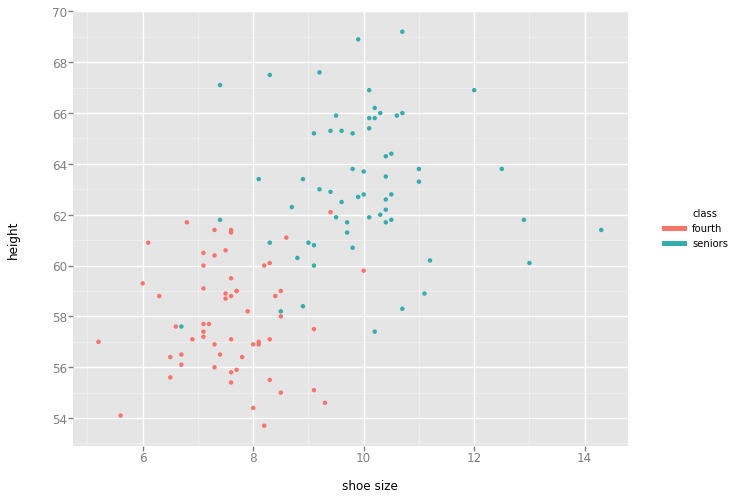

<ggplot: (8738892661365)>

In [12]:
ggplot(test,aes(x='shoe size',y='height',color='class'))+geom_point()

We are not going to get into parameter optimisation, you can use gridsearchCV to tune them. Procedure remains same as other algorithms

In [13]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [14]:
test['predicted']=knn.predict(x_test)

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


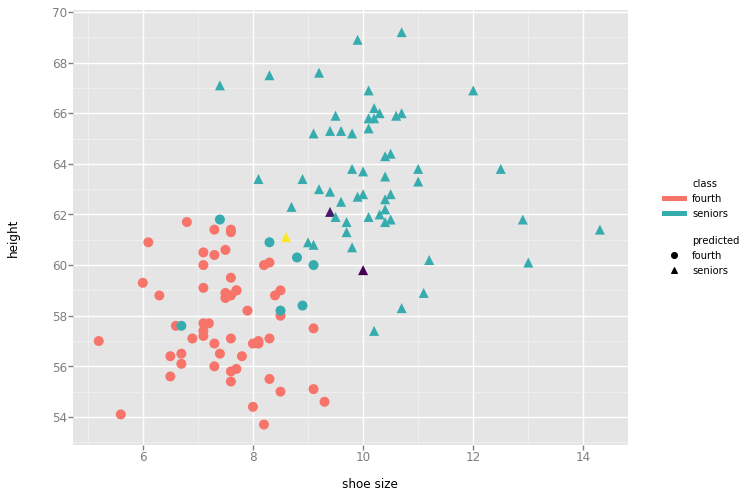

<ggplot: (8738887455285)>

In [15]:
ggplot(test,aes(x='shoe size',y='height',color='class',shape='predicted'))+geom_point(size=100)

In [16]:
pd.crosstab(test['class'],test['predicted'])

predicted,fourth,seniors
class,,
fourth,55,3
seniors,7,55


You can see that missclassification happens in boundry cases where neighbors are of mixed type

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,knn.predict(x_test))

0.9166666666666666

Now lets see how svm does on the same data

In [19]:
from sklearn import svm

In [20]:
help(svm.SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.linear_model.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  othe

Parameters to tune here are :

**C** : this is penaly on errors

**kernel** : this variable transformation which is used for making cases linearly separable . 'rbf' is good enough and fits very fast. You can also try 'linear', 'poly', 'rbf', 'sigmoid' or your own methods. These kernels will have their own parameters to tune.

**degree** : this is degree for polynomial kernel , defaults to 3. doesnt matter if you are using rbf kernel

**gamma** : parameter for rbf, poly and sigmoid . default 1/n_features

**coef0** : independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.

**class_weight** : generally it is a good idea to keep it as 'balanced' as discussed for other algorithms.


In [21]:
clf=svm.SVC(verbose=True,cache_size=2000,C=20,
            class_weight='balanced')
clf.fit(x_train,y_train)

[LibSVM]

/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=20, cache_size=2000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [26]:
!pip --version


pip 19.2.3 from /home/dell/anaconda3/lib/python3.7/site-packages/pip (python 3.7)


In [22]:
test['predicted_svm']=clf.predict(x_test)

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
pd.crosstab(test['class'],test['predicted_svm'])

predicted_svm,fourth,seniors
class,,
fourth,56,2
seniors,7,55


In [24]:
accuracy_score(y_test,clf.predict(x_test))

0.925

You can see that svm gives a huge boost in the accuracy , lets see visually where it has outsmarted KNN

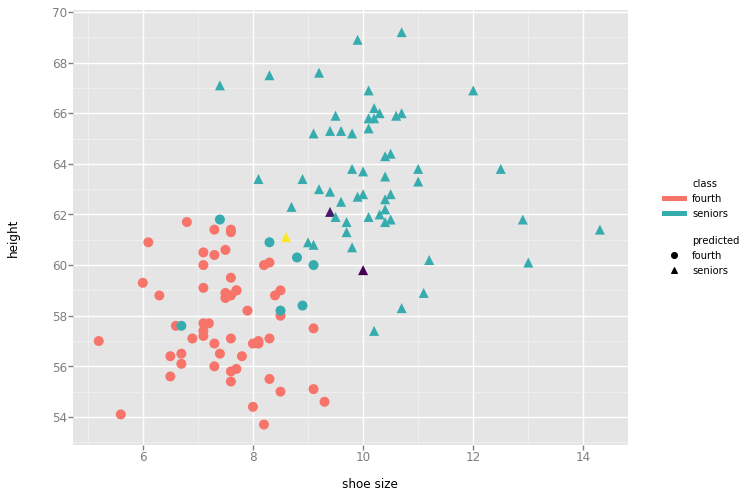

<ggplot: (8738887407429)>

In [25]:
ggplot(test,aes(x='shoe size',y='height',color='class',shape='predicted'))+geom_point(size=100)

You can see that , again missclassification at the boundry, but the reason is different from KNN. This is because of classes being not entirlely linearly separable. We saw in theoretical discussion that SVM allows some missclassification with penlaty . These missclassification are under the penalty limit according to training data.

Also this can probably be avoided or performance can be imporved if you tuned parameters

We'll conclude our discussion here. Please do the practice exercises . If you face any issue we'll discuss that either in class or QA forum on LMS.

Prepared By : Lalit Sachan (lalit.sachan@edvancer.in)

In case of any doubts or errata alert; please take to QA forum for discussion.

Doubts will be discussed in live class sessions too. [This doesnt apply for self paced students]